In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# dropping unhelpful columns
df = df.drop(columns = ['CustomerID'], axis = 1)

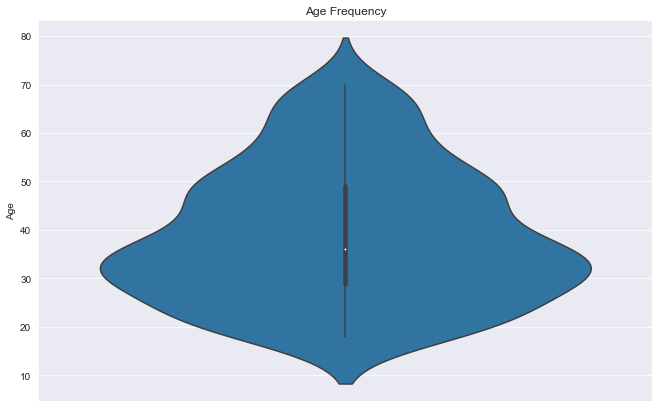

In [11]:
# customer age frequencies 
plt.figure(figsize = (11,7))
plt.title('Age Frequency')
sns.axes_style('dark')
sns.violinplot(y = df['Age'])
plt.show()

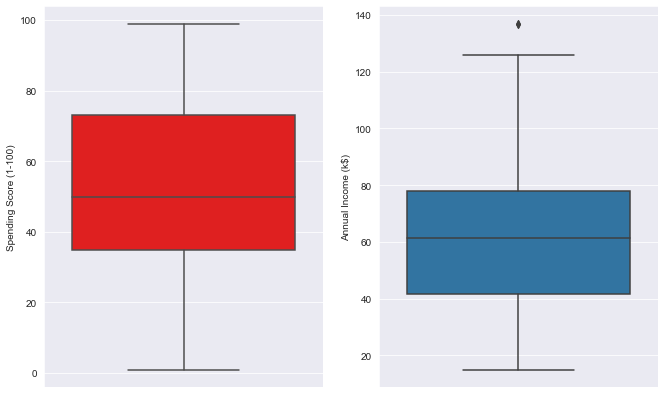

In [10]:
plt.figure(figsize = (11,7))
plt.subplot(1,2,1)
sns.boxplot(y = df['Spending Score (1-100)'], color ='r')
plt.subplot(1,2,2)
sns.boxplot(y = df['Annual Income (k$)'])
plt.show()

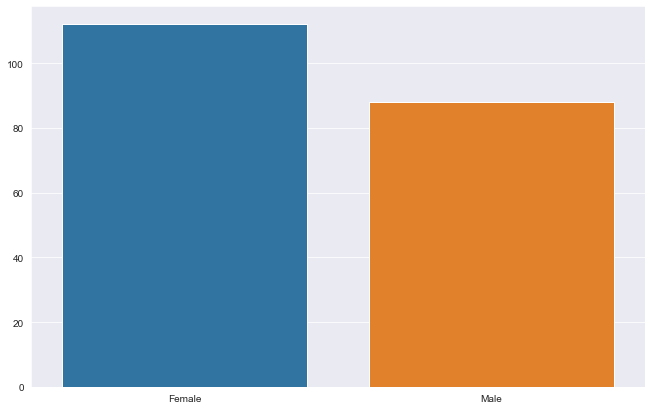

In [9]:
genders = df.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize = (11,7))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

In [12]:
# customers in each age group 
ages_18to25 = df.Age[(df['Age'] <= 25) & (df['Age'] >= 18)]
ages_26to35 = df.Age[(df['Age'] <= 35) & (df['Age'] >= 26)]
ages_36to45 = df.Age[(df['Age'] <= 45) & (df['Age'] >= 36)]
ages_46to55 = df.Age[(df['Age'] <= 55) & (df['Age'] >= 46)]
age55plus = df.Age[df['Age'] >= 56]

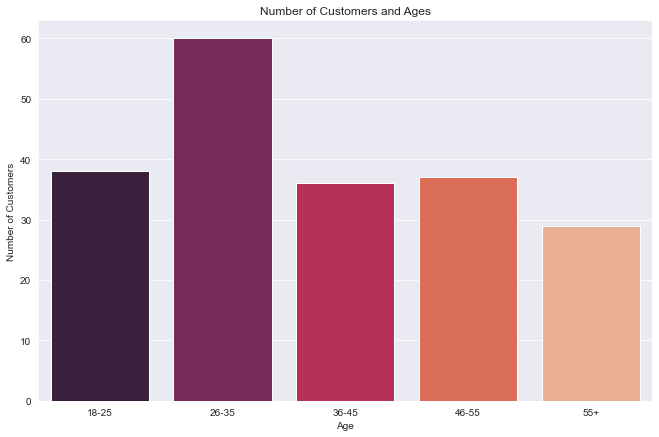

In [14]:
# bar chart to show customers in each age group 
x = ['18-25','26-35','36-45','46-55','55+']
y = [len(ages_18to25.values), len(ages_26to35.values), len(ages_36to45.values), len(ages_46to55.values), len(age55plus.values)]

plt.figure(figsize=(11,7))
sns.barplot(x=x, y=y, palette = 'rocket')
plt.title('Number of Customers and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [19]:
# customers by spending scores 
ss_1to20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21to40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41to60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61to80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81to100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ['1-20', '21-40', '41-60', '61-80', '81-100']
ssy = [len(ss_1to20.values), len(ss_21to40.values), len(ss_41to60.values), len(ss_61to80.values), len(ss_81to100.values)]

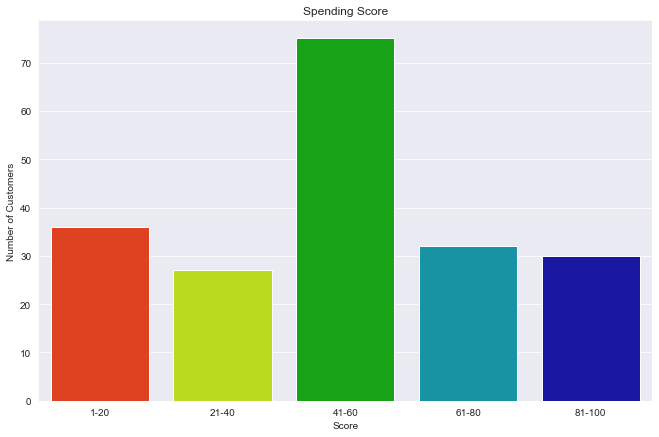

In [21]:
plt.figure(figsize=(11,7))
sns.barplot(x = ssx, y = ssy, palette = 'nipy_spectral_r')
plt.title('Spending Score')
plt.xlabel('Score')
plt.ylabel('Number of Customers')
plt.show()

In [23]:
# customers split by annual income 
income_0to30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
income_31to60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
income_61to90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
income_91to120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
income_121to150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

income_x = ['$ 0 - 30,000', '$ 30,001 - 60,000', '$ 60,001 - 90,000', '$ 90,001 - 120,000', '$ 121,001 - 150,000']
income_y = [len(income_0to30.values), len(income_31to60.values), len(income_61to90.values), len(income_91to120.values), len(income_121to150.values)]


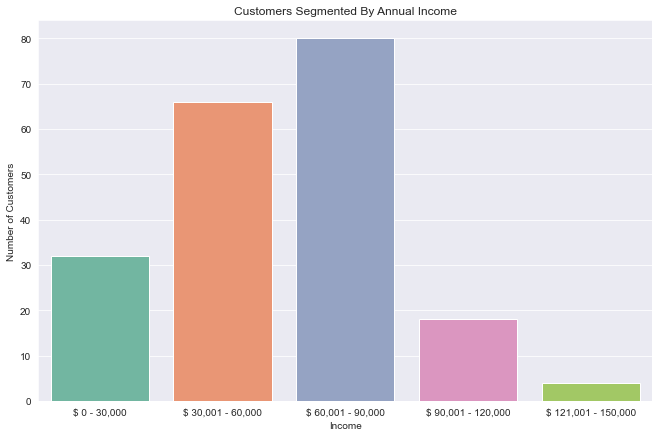

In [30]:
plt.figure(figsize = (11,7))
sns.barplot(x = income_x, y = income_y, palette = 'Set2')
plt.title('Customers Segmented By Annual Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

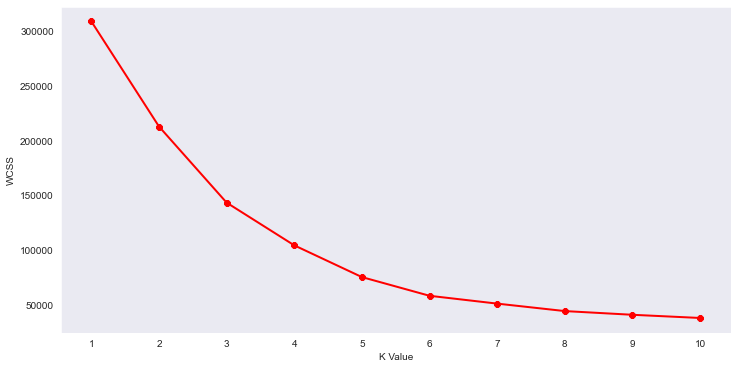

In [31]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

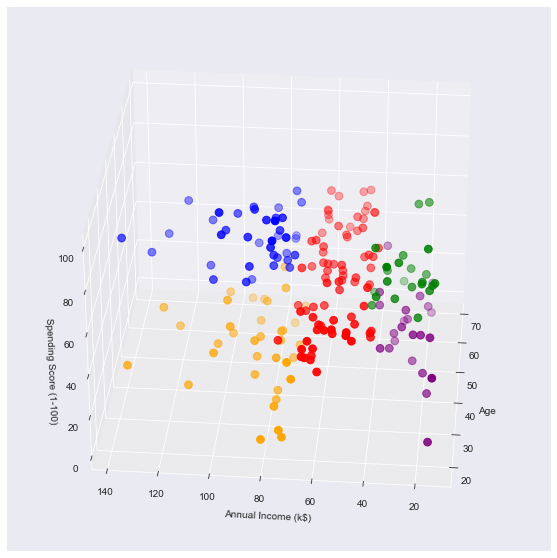

In [32]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()